In [64]:
#Question 2c
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import calendar
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [65]:
df=pd.read_csv('data/network_backup_dataset.csv')

In [66]:
def encode_filenames(files):
    for i in range(len(files)):
        files[i]=int (files[i].split('_')[-1])
    return files

def encode_day_names(days):
    day_to_num = dict(zip(list(calendar.day_name), range(1, 8)))
    return [day_to_num[day] for day in days]

In [67]:
x_data=df.ix[:,[0,1,2,3,4]].values
x_data[:, 4] = encode_filenames(x_data[:, 4])
x_data[:, 3] = encode_filenames(x_data[:, 3])
x_data[:, 1] = encode_day_names(x_data[:, 1])
y_data=df.ix[:,[5]].values
x_data

C:\Users\kprat\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array([[1L, 1, 1L, 0, 0],
       [1L, 1, 1L, 2, 12],
       [1L, 1, 1L, 2, 13],
       ..., 
       [15L, 7, 21L, 4, 26],
       [15L, 7, 21L, 4, 25],
       [15L, 7, 21L, 4, 24]], dtype=object)

In [68]:
ohe=OneHotEncoder()
x_data=ohe.fit_transform(np.array(x_data))


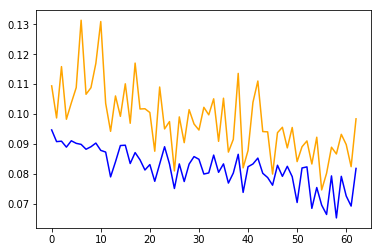

In [11]:
kf = KFold(n_splits=10)
i=0
tanh_test=[]
tanh_train=[]
for n in range(1,64,1):
    test_errors=[]
    train_errors=[]
    for train_index, test_index in kf.split(x_data):
        #print("TRAIN:", train_index, "TEST:", test_index)

        x_train, x_test = x_data[train_index], x_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        y_train=y_train.copy().reshape(-1,1)
        #y_test=y_test.reshape(-1,1)
        clf=MLPRegressor(hidden_layer_sizes=(n,),activation='tanh',random_state=42)
        clf.fit(x_train,np.asarray(y_train,dtype=np.float64)[:,0])
        predicted_test=clf.predict(x_test)
        #test_errors.append(np.sqrt(np.sum((predicted_test - y_test) ** 2)/y_test.size))
        test_errors.append((mean_squared_error(y_test, predicted_test)))
        predicted_train=clf.predict(x_train)
        #train_errors.append(np.sqrt(np.sum((predicted_train - y_train) ** 2)/y_train.size))
        train_errors.append((mean_squared_error(y_train, predicted_train)))

    tanh_test.append(sqrt(sum(test_errors)/10))
    tanh_train.append(sqrt(sum(train_errors)/10))
plt.plot(tanh_test,color='orange')
plt.plot(tanh_train,color='blue')
plt.show()

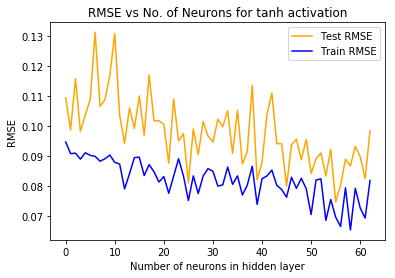

In [44]:
plt.plot(tanh_test,color='orange')
plt.plot(tanh_train,color='blue')
plt.xlabel('Number of neurons in hidden layer')
plt.ylabel('RMSE')
plt.legend(['Test RMSE','Train RMSE'])
plt.title('RMSE vs No. of Neurons for tanh activation')
plt.show()
#best values for number of neurons is 56 and RMSE is 0.07467439139373816
#train RMSE is 0.06960253264331268

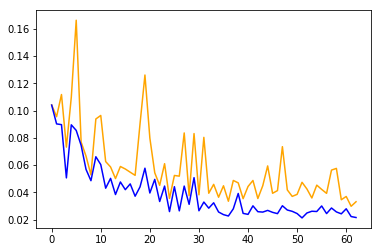

In [12]:
kf = KFold(n_splits=10)
i=0
relu_test=[]
relu_train=[]
for n in range(1,64):
    test_errors=[]
    train_errors=[]
    for train_index, test_index in kf.split(x_data):
        #print("TRAIN:", train_index, "TEST:", test_index)

        x_train, x_test = x_data[train_index], x_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        y_train=y_train.copy().reshape(-1,1)
        #y_test=y_test.reshape(-1,1)
        clf=MLPRegressor(hidden_layer_sizes=(n,),activation='relu',random_state=42)
        clf.fit(x_train,np.asarray(y_train,dtype=np.float64)[:,0])
        predicted_test=clf.predict(x_test)
        #test_errors.append(np.sqrt(np.sum((predicted_test - y_test) ** 2)/y_test.size))
        test_errors.append((mean_squared_error(y_test, predicted_test)))
        predicted_train=clf.predict(x_train)
        #train_errors.append(np.sqrt(np.sum((predicted_train - y_train) ** 2)/y_train.size))
        train_errors.append((mean_squared_error(y_train, predicted_train)))

    relu_test.append(sqrt(sum(test_errors)/10))
    relu_train.append(sqrt(sum(train_errors)/10))
    
plt.plot(relu_test,color='orange')
plt.plot(relu_train,color='blue')
plt.show()

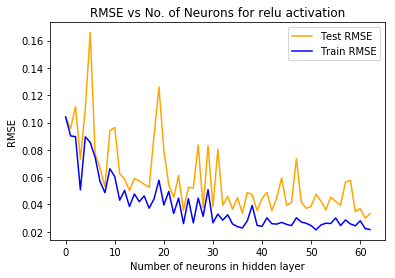

In [42]:
plt.plot(relu_test,color='orange')
plt.plot(relu_train,color='blue')
plt.xlabel('Number of neurons in hidden layer')
plt.ylabel('RMSE')
plt.title('RMSE vs No. of Neurons for relu activation')
plt.legend(['Test RMSE','Train RMSE'])
plt.show()
#best values for number of neurons are 37 test rmse=0.033544844657444374
#train rmse 0.02273690674616872

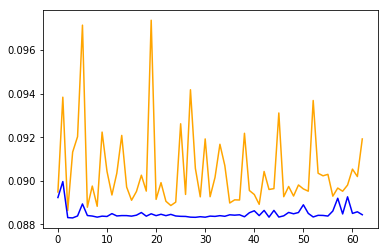

In [71]:
kf = KFold(n_splits=10)
i=0
log_test=[]
log_train=[]
for n in range(1,64):
    test_errors=[]
    train_errors=[]
    for train_index, test_index in kf.split(x_data):
        #print("TRAIN:", train_index, "TEST:", test_index)

        x_train, x_test = x_data[train_index], x_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]
        y_train=y_train.copy().reshape(-1,1)
        #y_test=y_test.reshape(-1,1)
        clf=MLPRegressor(hidden_layer_sizes=(n,),activation='logistic',random_state=42)
        clf.fit(x_train,np.asarray(y_train,dtype=np.float64)[:,0])
        predicted_test=clf.predict(x_test)
        #test_errors.append(np.sqrt(np.sum((predicted_test - y_te0st) ** 2)/y_test.size))
        test_errors.append((mean_squared_error(y_test, predicted_test)))
        predicted_train=clf.predict(x_train)
        #train_errors.append(np.sqrt(np.sum((predicted_train - y_train) ** 2)/y_train.size))
        train_errors.append((mean_squared_error(y_train, predicted_train)))

    log_test.append(sqrt(sum(test_errors)/10))
    log_train.append(sqrt(sum(train_errors)/10))
    
plt.plot(log_test,color='orange')
plt.plot(log_train,color='blue')
plt.show()

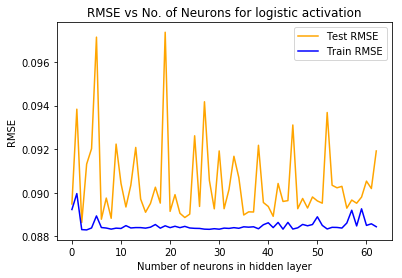

In [62]:
plt.plot(log_test,color='orange')
plt.plot(log_train,color='blue')
plt.xlabel('Number of neurons in hidden layer')
plt.ylabel('RMSE')
plt.legend(['Test RMSE','Train RMSE'])
plt.title('RMSE vs No. of Neurons for logistic activation')
plt.show()
#best values for number of neurons are 42 and RMSE is 0.08892250771703249 
#train rmse = 0.08840531379413591

#plotting fitted actual and residual

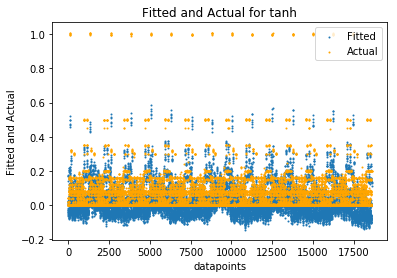

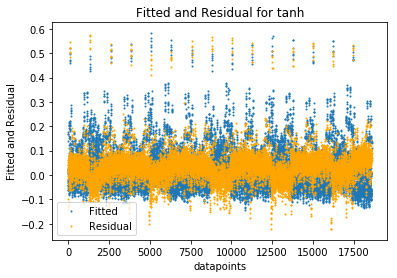

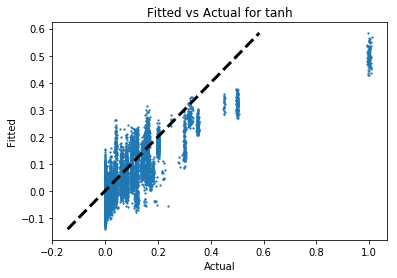

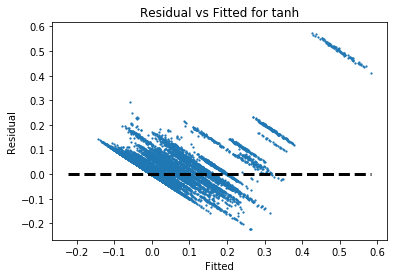

In [63]:
# tanh

kf = KFold(n_splits=10)
i=0
datapoints=[]
fitted=[]
actual=[]
residual=[]
for train_index, test_index in kf.split(x_data):
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    y_train=y_train.copy().reshape(-1,1)
    clf=MLPRegressor(hidden_layer_sizes=(55,),activation='tanh',random_state=42)
    clf.fit(x_train,np.asarray(y_train,dtype=np.float64)[:,0])
    predicted_test=clf.predict(x_test)
    predicted_train=clf.predict(x_train)
    datapoints.append(test_index)
    fitted.append(predicted_test)
    actual.append(y_test)
    residual.append([item for sublist in y_test for item in sublist]-predicted_test)
fitted = [item for sublist in fitted for item in sublist]
datapoints = [item for sublist in datapoints for item in sublist]
actual = [item for sublist in actual for item in sublist]
residual = [item for sublist in residual for item in sublist]

plt.close()
plt.scatter(datapoints,fitted,s=1)
plt.scatter(datapoints,actual,s=1,c='orange')
plt.xlabel('datapoints')
plt.ylabel('Fitted and Actual')
plt.legend(['Fitted','Actual'])
plt.title('Fitted and Actual for tanh')
plt.show()

plt.close()
plt.scatter(datapoints,fitted,s=1)
plt.scatter(datapoints,residual,s=1,c='orange')
plt.xlabel('datapoints')
plt.ylabel('Fitted and Residual')
plt.legend(['Fitted','Residual'])
plt.title('Fitted and Residual for tanh')
plt.show()

plt.close()
plt.scatter(x=actual,y=fitted,s=1.5)
plt.plot([min(fitted),max(fitted)], [min(fitted),max(fitted)],  'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Fitted')
plt.title('Fitted vs Actual for tanh')
plt.show()

plt.close()
plt.scatter(x=fitted,y=residual,s=1.5)
plt.plot([min(residual),max(fitted)], [0,0],  'k--', lw=3)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs Fitted for tanh')
plt.show()

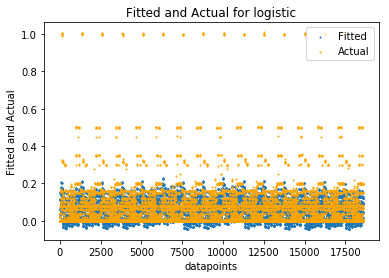

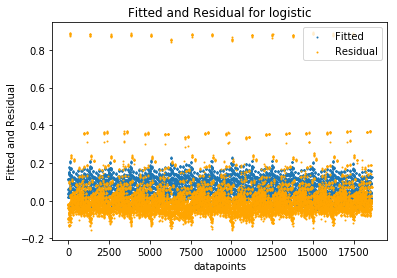

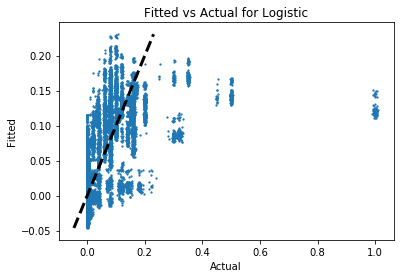

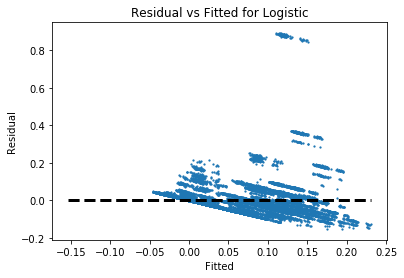

In [61]:
#plotting fitted actual and residual for logistic

kf = KFold(n_splits=10)
i=0
datapoints=[]
fitted=[]
actual=[]
residual=[]
for train_index, test_index in kf.split(x_data):
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    y_train=y_train.copy().reshape(-1,1)
    clf=MLPRegressor(hidden_layer_sizes=(42,),activation='logistic',random_state=42)
    clf.fit(x_train,np.asarray(y_train,dtype=np.float64)[:,0])
    predicted_test=clf.predict(x_test)
    predicted_train=clf.predict(x_train)
    datapoints.append(test_index)
    fitted.append(predicted_test)
    actual.append(y_test)
    residual.append([item for sublist in y_test for item in sublist]-predicted_test)
fitted = [item for sublist in fitted for item in sublist]
datapoints = [item for sublist in datapoints for item in sublist]
actual = [item for sublist in actual for item in sublist]
residual = [item for sublist in residual for item in sublist]

plt.close()
plt.scatter(datapoints,fitted,s=1)
plt.scatter(datapoints,actual,s=1,c='orange')
plt.xlabel('datapoints')
plt.ylabel('Fitted and Actual')
plt.legend(['Fitted','Actual'])
plt.title('Fitted and Actual for logistic')
plt.show()

plt.close()
plt.scatter(datapoints,fitted,s=1)
plt.scatter(datapoints,residual,s=1,c='orange')
plt.xlabel('datapoints')
plt.ylabel('Fitted and Residual')
plt.legend(['Fitted','Residual'])
plt.title('Fitted and Residual for logistic')
plt.show()

plt.close()
plt.scatter(x=actual,y=fitted,s=1.5)
plt.plot([min(fitted),max(fitted)], [min(fitted),max(fitted)],  'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Fitted')
plt.title('Fitted vs Actual for Logistic')
plt.show()

plt.close()
plt.scatter(x=fitted,y=residual,s=1.5)
plt.plot([min(residual),max(fitted)], [0,0],  'k--', lw=3)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs Fitted for Logistic')
plt.show()

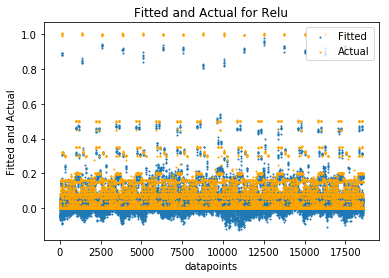

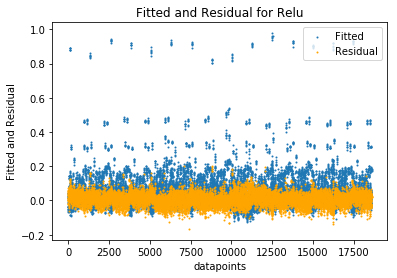

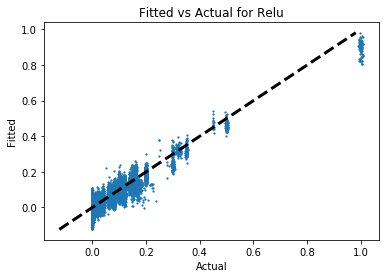

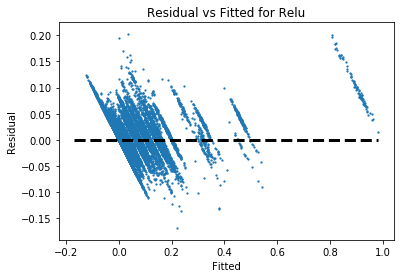

In [60]:
#plotting fitted actual and residual for logistic

kf = KFold(n_splits=10)
i=0
datapoints=[]
fitted=[]
actual=[]
residual=[]
for train_index, test_index in kf.split(x_data):
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    y_train=y_train.copy().reshape(-1,1)
    clf=MLPRegressor(hidden_layer_sizes=(37,),activation='relu',random_state=42)
    clf.fit(x_train,np.asarray(y_train,dtype=np.float64)[:,0])
    predicted_test=clf.predict(x_test)
    predicted_train=clf.predict(x_train)
    datapoints.append(test_index)
    fitted.append(predicted_test)
    actual.append(y_test)
    residual.append([item for sublist in y_test for item in sublist]-predicted_test)
fitted = [item for sublist in fitted for item in sublist]
datapoints = [item for sublist in datapoints for item in sublist]
actual = [item for sublist in actual for item in sublist]
residual = [item for sublist in residual for item in sublist]

plt.close()
plt.scatter(datapoints,fitted,s=1)
plt.scatter(datapoints,actual,s=1,c='orange')
plt.xlabel('datapoints')
plt.ylabel('Fitted and Actual')
plt.legend(['Fitted','Actual'])
plt.title('Fitted and Actual for Relu')
plt.show()

plt.close()
plt.scatter(datapoints,fitted,s=1)
plt.scatter(datapoints,residual,s=1,c='orange')
plt.xlabel('datapoints')
plt.ylabel('Fitted and Residual')
plt.legend(['Fitted','Residual'])
plt.title('Fitted and Residual for Relu')
plt.show()

plt.close()
plt.scatter(x=actual,y=fitted,s=1.5)
plt.plot([min(fitted),max(fitted)], [min(fitted),max(fitted)],  'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Fitted')
plt.title('Fitted vs Actual for Relu')
plt.show()

plt.close()
plt.scatter(x=fitted,y=residual,s=1.5)
plt.plot([min(residual),max(fitted)], [0,0],  'k--', lw=3)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs Fitted for Relu')
plt.show()

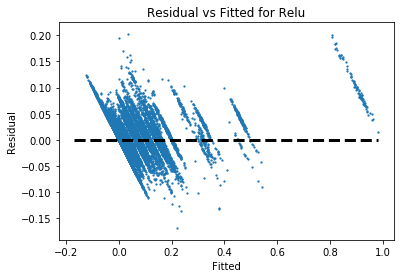

In [57]:
plt.close()
plt.scatter(x=fitted,y=residual,s=1.5)
plt.plot([min(residual),max(fitted)], [0,0],  'k--', lw=3)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs Fitted for Relu')
plt.show()